# Problem 4
What is the global minimum of the function 
$ f(x,y) = e^{\sin(50x)} + \sin(60e^y) + \sin(70\sin{x}) + \sin(\sin{80y}) - \sin(10(x+y)) + (x^2+y^2)/4 $ ?

Plotting the function given, we note that $f$ is bounded by the $(x^2 + y^2)/4$ term for large $x,y$; however, the function has many local minima/maxima at $x,y \approx 0$ making it difficult to find a global minimum.

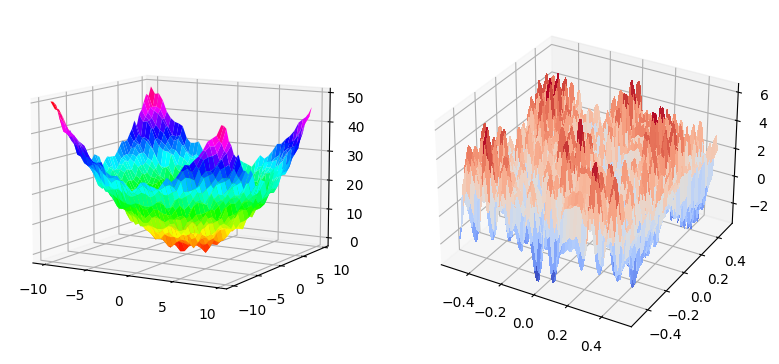

In [1]:
#from math import exp, sin
import numpy as np
from numpy import exp, sin
import matplotlib.pyplot as plt
from matplotlib import cm
f = lambda x,y: exp(sin(50*x)) + sin(60*exp(y)) + sin(70*sin(x)) + sin(sin(80*y)) - sin(10*(x+y)) + (x*x+y*y)/4
X = np.arange(-10,10,0.5)
Y = np.arange(-10,10,0.5)
X, Y = np.meshgrid(X,Y)
Z = f(X,Y)

# fig = plt.figure()
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.view_init(elev=10)
surf = ax.plot_surface(X,Y,Z,cmap=cm.hsv,linewidth=20)

X = np.arange(-0.5,0.5,0.001)
Y = np.arange(-0.5,0.5,0.001)
X, Y = np.meshgrid(X,Y)
Z = f(X,Y)
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(X,Y,Z,cmap=cm.coolwarm,linewidth=20,antialiased=False)

### Paper and pencil minimization
Note that we have

$ \begin{cases}
\min(e^{\sin(50x)}) = 1/e\\ 
\min(\sin(60 e^y)) = -1 \\
\min(\sin(\sin 70x)) = -\sin1 \\
\min(\sin(\sin 80y)) = -\sin1 \\
\min(-\sin(10(x+y)) = -1 \\
\min((x^2+y^2)/4) = 0 \\
\end{cases} \implies \min(f(x,y)) \approx 1/e-2-2\sin1 \approx -3.315 $

### Using built-in methods

In [2]:
f = lambda x,y: exp(sin(50*x)) + sin(60*exp(y)) + sin(70*sin(x)) + sin(sin(80*y)) - sin(10*(x+y)) + (x*x+y*y)/4
f_min = lambda x: f(x[0],x[1]) # wrapper for f so that it can be passed to scipy.optimize
from scipy.optimize import minimize
from time import time
methods = ["Nelder-Mead","Powell","CG","BFGS","L-BFGS-B","TNC","COBYLA","SLSQP","trust-constr"]
def time_method(method): # wrapper function to help time scipy.optimize with given method
    start = time()
    out = minimize(f_min,(0,0),method=method,tol=1e-12)
    return (out.fun, out.x, time()-start, method)
for method in methods:
    print(time_method(method))

(-0.7130747093105191, array([-0.02230223, -0.00472762]), 0.007046937942504883, 'Nelder-Mead')
(-2.966665564173802, array([ 0.24280684, -0.09332387]), 0.011039495468139648, 'Powell')
(-2.0990843569596604, array([-1.01123843, -0.09335979]), 0.01640629768371582, 'CG')
(-2.0990843569595934, array([-1.01123844, -0.09335979]), 0.01039576530456543, 'BFGS')
(-2.0990843569597404, array([-1.01123844, -0.09335979]), 0.0033600330352783203, 'L-BFGS-B')
(-0.7130747093103592, array([-0.02230224, -0.00472763]), 0.006999015808105469, 'TNC')
(-0.8627887931635007, array([-1.65508048,  0.51042469]), 0.0015561580657958984, 'COBYLA')
(-0.6254386181940512, array([-0.18837361,  0.77441795]), 0.004513263702392578, 'SLSQP')
(-1.452607474505165, array([-1.16099618, -0.00550989]), 0.06516742706298828, 'trust-constr')


As we can see, none of these methods yield well to our given function. The Powell method provides the lowest value of the functio, however, calculating the derivative of the function at the point given:

In [3]:
from scipy.optimize import approx_fprime
print(approx_fprime([ 0.24280684, -0.09332387], f_min, [1e-12,1e-12]))

[-0.00177635  0.        ]


we have that that the partial derivative with respect to $x$  of the function at this point is negative. Thus, we cannot have this as a global minimum of this function as we can show

In [4]:
print(f(0.2428064,-0.09332387)) # Minimum provided by scipy.optimize
print(f(0.2428066,-0.09332387)) # Lower value of fuction

-2.9666655635549026
-2.966665563987929


### Bringing out the big guns
Since this function has many local minima, we have to resort to using more specialized algorithms in order to find a global minimum. We use two below

##### Basin-hopping
The basin-hopping algorithm described in a 1997 paper by David J Wales and Jonathan Doye is a global optimization algorithm originally developed for finding the minimum energy structure of molecules. 

From the `scipy` documentation of the implementation of this function: 
> Designed to mimic the natural process of energy minimization of clusters of atoms, it works well for similar problems with “funnel-like, but rugged” energy landscapes

Thus, it should work well for our function:

In [5]:
from scipy.optimize import basinhopping
import time
start = time.time()
print(basinhopping(f_min, [0,0], niter = 5000))
print("Time elapsed: ", time.time()-start, " seconds")

                        fun: -3.3068686474749844
 lowest_optimization_result:       fun: -3.3068686474749844
 hess_inv: array([[ 1.66496802e-04, -1.63442544e-06],
       [-1.63442544e-06,  1.01069713e-04]])
      jac: array([1.18911266e-05, 1.63316727e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 168
      nit: 8
     njev: 53
   status: 2
  success: False
        x: array([-0.02440309,  0.21061242])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 980
                       nfev: 325678
                        nit: 5000
                       njev: 105109
                    success: False
                          x: array([-0.02440309,  0.21061242])
Time elapsed:  33.00804781913757  seconds


##### Differential Evolution
Differential evolution is a stochastic genetic algorithm that is often used for global optimization problems. Briefly, some initial candidates for the minimum of the function are generated. Then these candidates are "bred" and similarly to the process of natural selection, over multiple generations, candidates that are closer to the minimum of the function are generated

In [6]:
from scipy.optimize import differential_evolution
import time
start = time.time()
print(differential_evolution(f_min, [[-1,1],[-1,1]],tol=1e-12))
print("Time elapsed: ", time.time()-start, " seconds")

     fun: -3.306868647475183
 message: 'Optimization terminated successfully.'
    nfev: 1956
     nit: 63
 success: True
       x: array([-0.02440308,  0.21061243])
Time elapsed:  0.25775575637817383  seconds


### Wrapping it up: more digits
Since we now have the location of the global minimum of the function, we can use local optimization algorithms to get more digits of the function's minimum. In this case, we'll start with the result given above as the minimum of the function and then do a simple grid search in the neighborhood of this point, updating the resulting minimum until we get the desired accuracy. 

In [7]:
from mpmath import mp, mpf, exp, sin
from tqdm import tqdm
mp.dps = 1000
f = lambda x,y: exp(sin(50*x)) + sin(60*exp(y)) + sin(70*sin(x)) + sin(sin(80*y)) - sin(10*(x+y)) + (x*x+y*y)/4
x = mpf("-0.02440308")
y = mpf("0.21061242")
mins = [None]
step = mpf("1e-7")
for i in tqdm(range(10000)):
    neighborhood = [[x,y+step,f(x,y+step)],
                    [x,y-step,f(x,y-step)],
                    [x+step,y,f(x+step,y)],
                    [x-step,y,f(x-step,y)],
                    [x-step,y-step,f(x-step,y-step)],
                    [x-step,y+step,f(x-step,y+step)],
                    [x+step,y-step,f(x+step,y-step)],
                    [x+step,y+step,f(x+step,y+step)]]
    min_f_value = min(neighborhood, key = lambda x: x[2])
    x,y,minimum = min_f_value
    mins.append(minimum)
    if mins[-1]==mins[-2]: print(i); break
    step /= 2
print(mins[-1])

 16%|██████████████████▉                                                                                                | 1645/10000 [01:10<05:58, 23.30it/s]

1645
-3.30686864747523728007611377089851565716648236147628821750129308549630919983788829503582548807528349918619263089113643071713269547918357052753548148532349311966605549649177098780556273980617740872901417026427239222708620733463947755147440345559705900071013093048454979004125739787700676066240316159772461121789325953629405393753390107412914886747663311696227941736294239629265832107916338101316851063267855401990040152471171435568823442063752168543176730945790942576888235109714850485308352098632633998355794784915463010454709967946731107000430981791059365267442940883974863388219036416544051720947665168360175353514147576012479164362997035635341769389573535059863547364212282252868887874969550982789814362852139049411534124539538526972785125726736255318854660444374286187367953862838938586899796304777948631853716589905225050450767234347594968878043952450979673710426191998157799097950896729788631717339280799486171775182542954730247728376101596131982382991404069551497456440511842541142406112